In [1]:
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
# –ù–∞–º –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ pandas, numpy –∏ matplotlib –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏, —Ä–∞—Å—á–µ—Ç–æ–≤ –∏ –≤–∏–∑—É–∞–ª—å–∑–∞—Ü–∏–∏
# —Ç–∞–∫–∂–µ spacy –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ç–µ–∫—Å—Ç–æ–º, seaborn –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –∏ –¥—Ä—É–≥–∏–µ.
# –ù–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —Ö–æ–¥—É.

import spacy
import pandas as pd
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
import collections

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [16]:
# –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç
tweets = pd.read_csv('ttt.csv', encoding = "cp1251", delimiter = ";")
tweets.head()
a = tweets["–ö—Ä–∞—Ç–∫–æ–µ\n—Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ"]
#print(a)

In [18]:
tweets.head()

‚Ññ –ø/–ø    ‚Ññ\n–¥–æ–∫—É–º–µ–Ω—Ç–∞  –î–∞—Ç–∞\n—Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏              –ò—Å—Ö. ‚Ññ\n–î–∞—Ç–∞  \
0      1  WSR/1-838/2019            43564.0       208-409\n08.04.2019   
1      2  WSR/1-837/2019            43564.0        05-338\n09.04.2019   
2      3  WSR/1-835/2019            43564.0   –ò10-14/3137\n09.04.2019   
3      4  WSR/1-834/2019            43564.0    –î2/7121-–ò–°\n03.04.2019   
4      5  WSR/1-833/2019            43564.0  15-20/06-911\n08.04.2019   

       –ê–¥—Ä–µ—Å–∞—Ç                                              –ê–≤—Ç–æ—Ä  \
0  –£—Ä–∞–∑–æ–≤ –†.–ù.                     –ê–Ω—Ç–æ–Ω–æ–≤–∞ –°.–í. (–ê–û ¬´–ò–Ω—Ç–µ—Ä—Ñ–∞–∫—Å¬ª)   
1  –£—Ä–∞–∑–æ–≤ –†.–ù.  –ö–∞—Ä—Ç–æ—à–∫–∏–Ω –°.–ê. (–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ –ø—Ä–æ—Å–≤–µ—â–µ–Ω–∏—è –†–æ—Å—Å–∏...   
2  –£—Ä–∞–∑–æ–≤ –†.–ù.   –¶–∏–≤–∏–ª–µ–≤ –°.–ï. (–ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è –ö–µ–º–µ—Ä–æ–≤—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏)   
3  –ò–≤–∞–Ω—é–∫ –õ.–ê.  –í–æ–ª–∫–æ–≤ –ì.–ê. (–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∞ –†–æ—Å—Å–∏–π—Å–∫–æ...   
4  –£—Ä–∞–∑–æ–≤ –†.–ù.  –ê—Ç–∞–Ω–æ–≤ –ò.–í. (–°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π –∞–≥...   

                                 –ö—Ä–∞—Ç–∫–æ–µ\n—Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ  
0  –í—Ö - –û –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å–µ—Ç–µ–≤–æ–≥–æ –∏–∑–¥–∞...        NaN  
1  –í—Ö - –û–± —É—á–∞—Å—Ç–∏–∏ –≤ —Å–æ–≤–µ—â–∞–Ω–∏–∏ –ø–æ –≤–æ–ø—Ä–æ—Å—É –¥–æ—Ä–∞–±–æ—Ç...        NaN  
2  –í—Ö - –û –∫–æ–º–∞–Ω–¥–∏—Ä–æ–≤–∞–Ω–∏–∏ –°–∞–ª–∏–∫–æ–≤–æ–π –ö. –∏ –ì–ª—É—à–∫–æ –î....        NaN  
3  –í—Ö - –û–± —É—á–∞—Å—Ç–∏–∏ –≤ –ß–µ–º–ø–∏–æ–Ω–∞—Ç–µ –º–∏—Ä–∞ –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ...        NaN  
4  –í—Ö - –û–± —É—á–∞—Å—Ç–∏–∏ –≤ —Ü–µ—Ä–µ–º–æ–Ω–∏–∏ –æ—Ç–∫—Ä—ã—Ç–∏—è –í—É–∑–æ–≤—Å–∫–æ–≥...        NaN

In [33]:
#–æ–ø—Ä–µ–¥–µ–ª–∏–º –∫–æ–ª-–≤–æ —Ç–≤–∏—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ –∫–ª–∞—Å—Å–∞–º
b = a.value_counts()
b = b.head(15)
print(b)

–í—Ö - –û —Å–æ—Å—Ç–∞–≤–µ –°–ú–ò –Ω–∞ WorldSkills Kazan 2019                                                                                                                                                              51
–í—Ö - –û –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –∑–∞—è–≤–∫–∏ –Ω–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ —ç–∫–∑–∞–º–µ–Ω–∞ –ø–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∞–º –í–æ—Ä–ª–¥—Å–∫–∏–ª–ª—Å –†–æ—Å—Å–∏—è –≤ 2019 –≥–æ–¥—É                                                                                           32
–í—Ö - –û–± —É—á–∞—Å—Ç–∏–∏ –≤ —Ñ–∏–Ω–∞–ª–µ II –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–≥–æ –º–µ–∂–≤—É–∑–æ–≤—Å–∫–æ–≥–æ —á–µ–º–ø–∏–æ–Ω–∞—Ç–∞ ¬´–ú–æ–ª–æ–¥—ã–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—ã (–í–æ—Ä–ª–¥—Å–∫–∏–ª–ª—Å –†–æ—Å—Å–∏—è)¬ª                                                                                           30
–í—Ö - –û –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ –≤ –†–µ–≥–∏–æ–Ω–∞–ª—å–Ω–æ–º —Å–æ–≤–µ—Ç–µ –°–æ—é–∑–∞                                                                                                  

In [7]:
#–≤—ã–±–æ—Ä–∫–∞ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –≤ 1 –∫–ª–∞—Å—Å
# —Ç–≤–∏—Ç—ã —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å—é –º–µ–Ω—å—à–µ 0.65 –º–æ–∂–Ω–æ —É–±—Ä–∞—Ç—å
tweets_conf = tweets[tweets['airline_sentiment_confidence'] >= 0.65]
tweets_conf.airline_sentiment_confidence.value_counts()

1.0000    10445
0.6667       71
0.6632       35
0.6596       30
0.6559       30
          ...  
0.7022        1
0.7991        1
0.9633        1
0.6928        1
0.7135        1
Name: airline_sentiment_confidence, Length: 619, dtype: int64

30.0
20.0


<AxesSubplot:>

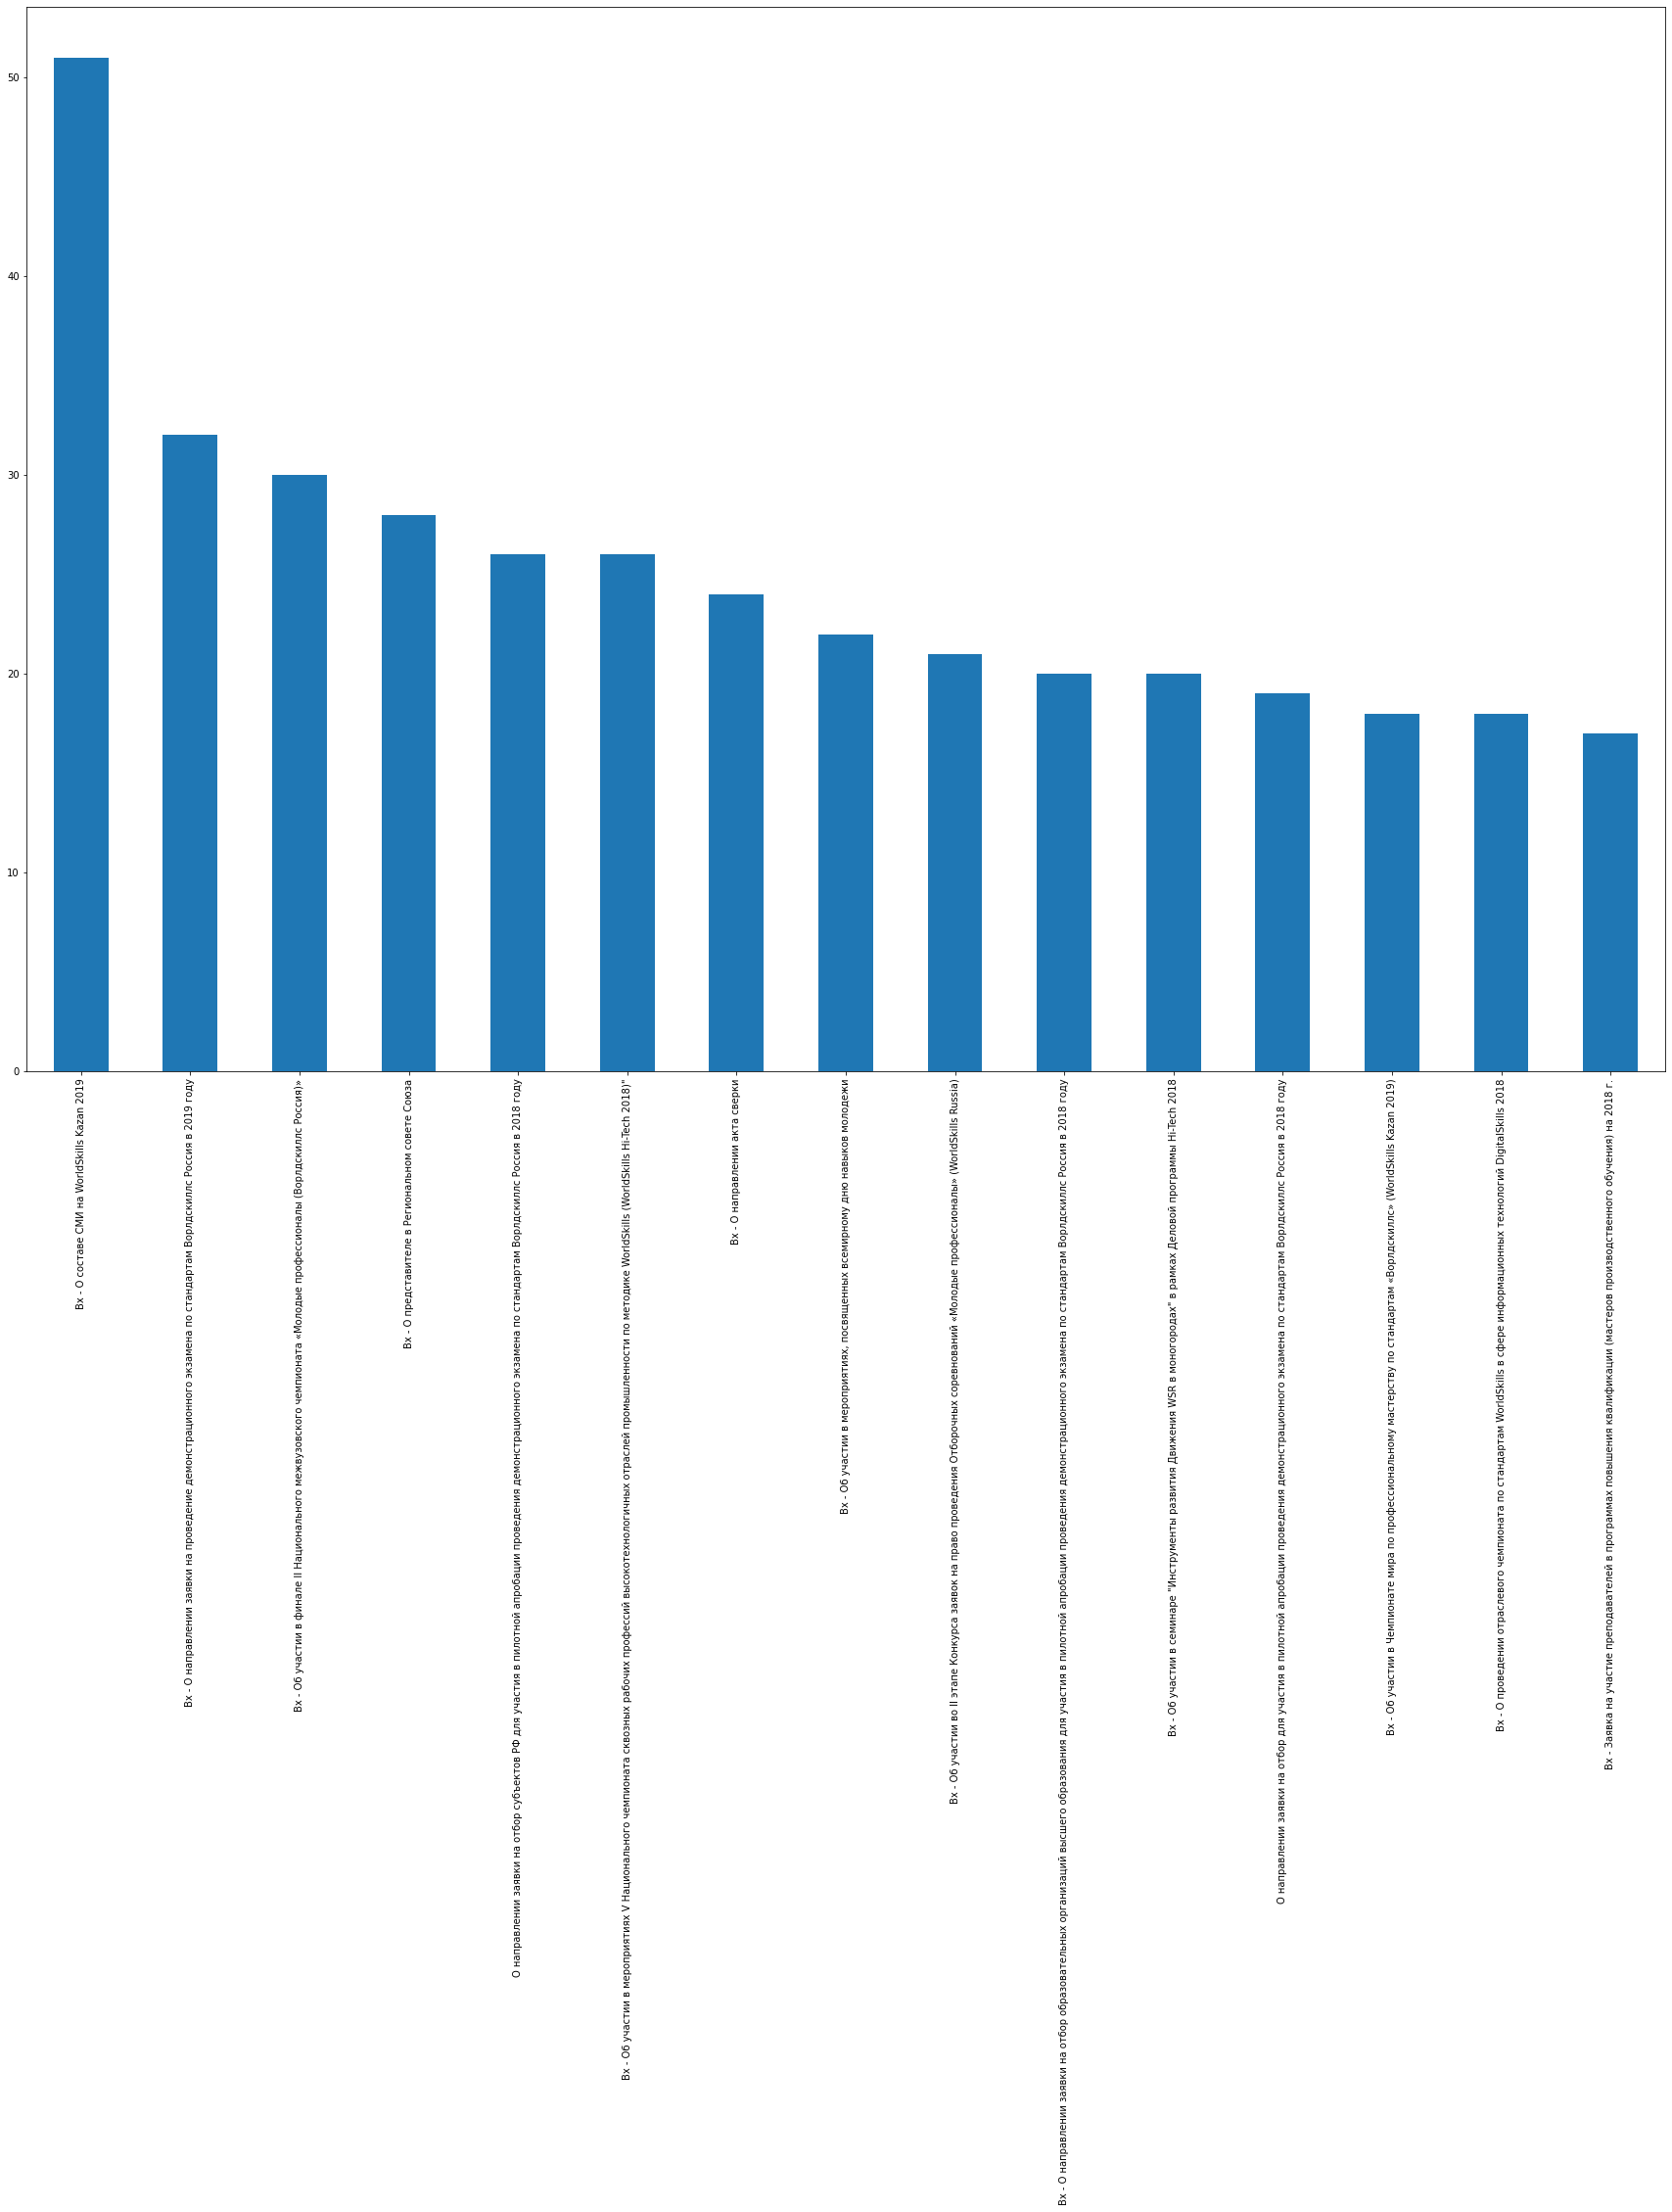

In [42]:
# —Å–º–æ—Ç—Ä–∏–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Ç–≤–∏—Ç–æ–≤ –ø–æ –∫–æ–º–ø–∞–Ω–∏—è–º
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 30
plot_size[1] = 20
plt.rcParams["figure.figsize"] = plot_size 

b.plot(kind='bar', autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

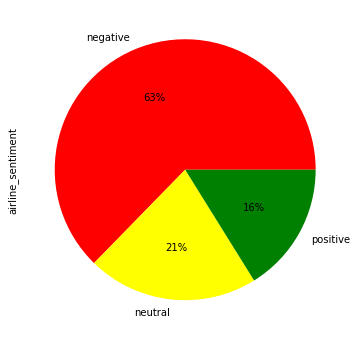

In [9]:
# –¥–æ–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –∫–ª–∞—Å—Å–æ–≤
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<AxesSubplot:xlabel='airline'>

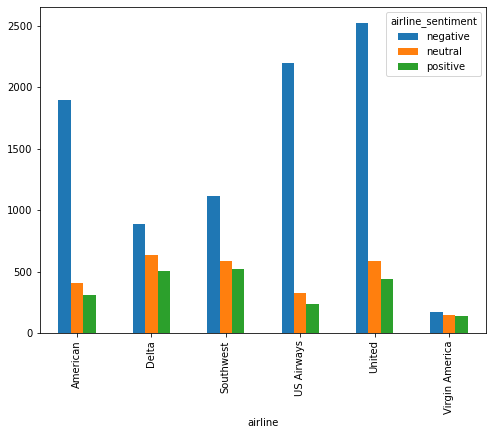

In [10]:
#–†–∞–∑–±–∏–≤–∫–∞ –ø–æ –∫–ª–∞—Å—Å–∞–º –¥–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–ø–∞–Ω–∏–∏
airline_sentiment = tweets_conf.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [43]:
#—Å–º–æ—Ç—Ä–∏–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Å–∞–º–∏—Ö —Ç–≤–∏—Ç–æ–≤
tweets.text

AttributeError: 'DataFrame' object has no attribute 'text'

#### –≤–∏–¥–∏–º —á—Ç–æ –ø–µ—Ä–≤—ã–º —Ç–æ–∫–µ–Ω–æ–º –∏–¥–µ—Ç –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Ç—ç–≥ —Å –∏–º–µ–Ω–µ–º –∞–≤–∏–∞–∫–æ–º–ø–∞–Ω–∏–∏, –≤—Ç–æ—Ä—ã–º –∫–∞–∫ –ø—Ä–µ–¥–ª–æ–≥ –∏–ª–∏ –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏–µ, –∏—Ö –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å

In [12]:
#–æ—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
list(tweets_conf.columns.values)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [13]:
#–æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
df_tweets = tweets_conf[['airline_sentiment','airline','text']]

In [14]:
#–¥–µ–ª–∞–µ–º –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–∞ —Ç–≤–∏—Ç–æ–≤ —Å –ø–æ–º–æ—â—å—é nltk, —Ç.–∫. —ç—Ç–æ –æ–¥–Ω–∞ –∏–∑ —Å–∞–º—ã—Ö —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö,
#—É–¥–æ–±–Ω—ã—Ö –∏ —ç—Ñ—Ñ–µ—Ä—Ç–∏–≤–Ω—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ —è–∑—ã–∫–∞.
#–õ–µ–º–æ—Ç–∏–∑–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç, —Ç.–µ. –ø—Ä–∏–≤–µ–¥–µ–º –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ –≤ –µ–≥–æ –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—É—é —Ñ–æ—Ä–º—É
#–£–±–µ—Ä–µ–º –ª–∏—à–Ω–∏–µ –∑–Ω–∞–∫–∏, –ø—Ä–∏–≤–µ–¥–µ–º –≤—Å–µ –∑–∞–≥–ª–∞–≤–Ω—ã–µ –±—É–∫–≤—ã –∫ –ø—Ä–æ–ø–∏—Å–Ω–æ–º—É –≤–∏–¥—É

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sergey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sergey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [15]:
import nltk
nltk.download('punkt')

pd.set_option('display.max_colwidth', None)
df_tweets['norm_text'] = df_tweets.text.apply(normalizer)
df_tweets[['text','norm_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sergey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
<ipython-input-15-3cfd0bac7fbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['norm_text'] = df_tweets.text.apply(normalizer)


text  \
0                                                                                                       @VirginAmerica What @dhepburn said.   
2                                                                   @VirginAmerica I didn't today... Must mean I need to take another trip!   
3            @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                   @VirginAmerica and it's a really big bad thing about it   
5  @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   

                                                                                   norm_text  
0                                                                           [dhepburn, said]  
2                                             [today, must, mean, need, take, another, trip]  
3  [really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]  
4                                                                  [really, big, bad, thing]  
5                        [would, pay, flight, seat, playing, really, bad, thing, flying, va]

In [16]:
# –≤—ã–¥–µ–ª—è–µ–º n-–≥—Ä–∞–º–º—ã
from nltk import ngrams
def ngrams(input_list):
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    return bigrams
df_tweets['grams'] = df_tweets.norm_text.apply(ngrams)
df_tweets[['grams']].head()

<ipython-input-16-6002d58bc17f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['grams'] = df_tweets.norm_text.apply(ngrams)


grams
0                                                                                                                                          [dhepburn said]
2                                                                                [today must, must mean, mean need, need take, take another, another trip]
3  [really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse]
4                                                                                                                         [really big, big bad, bad thing]
5                                       [would pay, pay flight, flight seat, seat playing, playing really, really bad, bad thing, thing flying, flying va]

In [17]:
df_tweets

airline_sentiment         airline  \
0               neutral  Virgin America   
2               neutral  Virgin America   
3              negative  Virgin America   
4              negative  Virgin America   
5              negative  Virgin America   
...                 ...             ...   
14634          negative        American   
14636          negative        American   
14637           neutral        American   
14638          negative        American   
14639           neutral        American   

                                                                                                                                                         text  \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
5                    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
...                                                                                                                                                       ...   
14634                                                                                                              @AmericanAir right on cue with the delaysüëå   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

                                                                                                 norm_text  \
0                                                                                         [dhepburn, said]   
2                                                           [today, must, mean, need, take, another, trip]   
3                [really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]   
4                                                                                [really, big, bad, thing]   
5                                      [would, pay, flight, seat, playing, really, bad, thing, flying, va]   
...                                                                                                    ...   
14634                                                                                         [cue, delay]   
14636  [minute, late, flight, warning, communication, minute, late, flight, called, shitty, customer, svc]   
14637                                                               [bring, american, airline, blackberry]   
14638                                 [money, change, flight, answer, phone, suggestion, make, commitment]   
14639              [ppl, need, know, many, seat, next, flight, plz, put, u, standby, people, next, flight]   

                                                                                                                                                                                grams  
0                                               

In [18]:
# 20 —Å–∞–º—ã—Ö —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤/n-–≥—Ä–∞–º–º –¥–ª—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
neg = df_tweets[df_tweets['airline_sentiment'] == 'negative']
neg.head()

airline_sentiment         airline  \
3           negative  Virgin America   
4           negative  Virgin America   
5           negative  Virgin America   
15          negative  Virgin America   
17          negative  Virgin America   

                                                                                                                                         text  \
3              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                     @VirginAmerica and it's a really big bad thing about it   
5    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
15                                                                                              @VirginAmerica SFO-PDX schedule is still MIA.   
17  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   

                                                                                         norm_text  \
3        [really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]   
4                                                                        [really, big, bad, thing]   
5                              [would, pay, flight, seat, playing, really, bad, thing, flying, va]   
15                                                                     [pdx, schedule, still, mia]   
17  [flew, nyc, sfo, last, week, fully, sit, seat, due, two, large, gentleman, either, side, help]   

                                                                                                                                                                 grams  
3              [really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse]  
4                                                                                                                                     [really big, big bad, bad thing]  
5                                                   [would pay, pay flight, flight seat, seat playing, playing really, really bad, bad thing, thing flying, flying va]  
15                                                                                                                           [pdx schedule, schedule still, still mia]  
17  [flew nyc, nyc sfo, sfo last, last week, week fully, fully sit, sit seat, seat due, due two, two large, large gentleman, gentleman either, either side, side help]

In [19]:
#–¥–ª—è n-–≥—Ä–∞–º–º
import itertools

all_neg_ngrams = list(itertools.chain(*neg.grams))

# —Å—á–µ—Ç—á–∏–∫
counts_neg_ngrams = collections.Counter(all_neg_ngrams)

counts_neg_ngrams.most_common(20)

[('customer service', 428),
 ('http co', 424),
 ('cancelled flightled', 412),
 ('late flight', 212),
 ('cancelled flighted', 187),
 ('flight cancelled', 179),
 ('late flightr', 138),
 ('hold hour', 126),
 ('flightled flight', 120),
 ('cancelled flight', 119),
 ('flight delayed', 114),
 ('call back', 104),
 ('booking problem', 93),
 ('gate agent', 82),
 ('flight flight', 70),
 ('delayed flight', 68),
 ('hour late', 67),
 ('flight attendant', 57),
 ('wait time', 54),
 ('flighted flight', 53)]

In [26]:
#–¥–ª—è —Å–ª–æ–≤
all_neg_words = list(itertools.chain(*neg.norm_text))

#—Å—á–µ—Ç—á–∏–∫
counts_neg_words = collections.Counter(all_neg_words)

counts_neg_words.most_common(20)

[('flight', 3039),
 ('hour', 1047),
 ('get', 961),
 ('cancelled', 844),
 ('service', 754),
 ('customer', 741),
 ('time', 728),
 ('u', 696),
 ('bag', 636),
 ('hold', 600),
 ('plane', 587),
 ('help', 575),
 ('call', 490),
 ('amp', 483),
 ('delayed', 468),
 ('day', 443),
 ('flightled', 435),
 ('co', 432),
 ('still', 427),
 ('one', 426)]

In [27]:
# 20 —Å–∞–º—ã—Ö —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤/n-–≥—Ä–∞–º–º –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
pos = df_tweets[df_tweets['airline_sentiment'] == 'positive']
pos.head()

airline_sentiment         airline  \
6           positive  Virgin America   
8           positive  Virgin America   
9           positive  Virgin America   
11          positive  Virgin America   
12          positive  Virgin America   

                                                                                                                                           text  \
6                                                               @VirginAmerica yes, nearly every time I fly VX this ‚Äúear worm‚Äù won‚Äôt go away :)   
8                                                                                               @virginamerica Well, I didn't‚Ä¶but NOW I DO! :-D   
9                                                              @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.   
11                                                          @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D   
12  @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p   

                                                                                   norm_text  \
6                                        [nearly, every, time, fly, vx, ear, worm, go, away]   
8                                                                                         []   
9                                                      [amazing, arrived, hour, early, good]   
11                                 [lt, pretty, graphic, much, better, minimal, iconography]   
12  [great, deal, already, thinking, nd, trip, australia, amp, even, gone, st, trip, yet, p]   

                                                                                                                                                        grams  
6                                                                            [nearly every, every time, time fly, fly vx, vx ear, ear worm, worm go, go away]  
8                                                                                                                                                          []  
9                                                                                                     [amazing arrived, arrived hour, hour early, early good]  
11                                                                [lt pretty, pretty graphic, graphic much, much better, better minimal, minimal iconography]  
12  [great deal, deal already, already thinking, thinking nd, nd trip, trip australia, australia amp, amp even, even gone, gone st, st trip, trip yet, yet p]

In [22]:
#–¥–ª—è n-–≥—Ä–∞–º–º
all_pos_ngrams = list(itertools.chain(*pos.grams))

#—Å—á–µ—Ç—á–∏–∫
counts_pos_ngrams = collections.Counter(all_pos_ngrams)

counts_pos_ngrams.most_common(20)

[('http co', 209),
 ('customer service', 89),
 ('flight attendant', 25),
 ('quick response', 19),
 ('great flight', 17),
 ('best airline', 15),
 ('great job', 15),
 ('great service', 15),
 ('gate agent', 15),
 ('thank much', 15),
 ('good work', 14),
 ('thanks help', 14),
 ('guy rock', 13),
 ('looking forward', 13),
 ('booking problem', 13),
 ('great customer', 12),
 ('flight crew', 12),
 ('keep good', 12),
 ('cancelled flightled', 12),
 ('love flying', 11)]

In [28]:
#–¥–ª—è —Å–ª–æ–≤
all_pos_words = list(itertools.chain(*pos.norm_text))

#—Å—á–µ—Ç—á–∏–∫
counts_pos_words = collections.Counter(all_pos_words)

counts_pos_words.most_common(20)

[('flight', 391),
 ('thanks', 278),
 ('thank', 211),
 ('http', 209),
 ('co', 209),
 ('great', 179),
 ('service', 156),
 ('u', 129),
 ('guy', 117),
 ('customer', 114),
 ('love', 107),
 ('get', 106),
 ('much', 101),
 ('time', 99),
 ('best', 98),
 ('airline', 94),
 ('good', 93),
 ('help', 77),
 ('crew', 75),
 ('today', 74)]

### –ú–æ–¥–µ–ª—å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–∞

In [29]:
# –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥
features = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

In [30]:
# –ø–æ—á–∏—Å—Ç–∏–º —Ç–µ–∫—Å—Ç
processed_features = []

for sentence in range(0, len(features)):
    # —É–¥–∞–ª–∏–º –≤—Å–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # —É–¥–∞–ª–∏–º –≤—Å–µ –æ–¥–∏–Ω–æ—á–Ω—ã–µ –±—É–∫–≤—ã
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # –£–¥–∞–ª–∏–º –æ–¥–∏–Ω–æ—á–Ω—ã–µ –±—É–∫–≤—ã —Å –Ω–∞—á–∞–ª–∞
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # –ó–∞–º–µ–Ω–∏–º –ø–æ—Å—Ç–æ—Ä—è—é—â–∏–µ—Å—è –ø—Ä–æ–±–µ–ª—ã –æ–¥–∏–Ω–æ—á–Ω—ã–º–∏
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤—Å–µ –∑–∞–≥–ª–∞–≤–Ω—ã–µ –≤ –ø—Ä–æ–ø–∏—Å–Ω—ã–µ –±—É–∫–≤—ã
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [31]:
# –ü—Ä–∏–≤–æ–¥–∏–º —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—É—é —Ñ–æ—Ä–º—É –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [32]:
# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [33]:
# –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å. –ò—Å–ø–æ–ª—å–∑—É–µ–º RandomForestClassifier, –∫–∞–∫ –æ–¥–∏–Ω –∏–∑ –ª—É—á—à–∏—Ö –≤–∏–¥–æ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ –¥–ª—è –Ω–∞–±–æ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö —Å –±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [34]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
predictions = text_classifier.predict(X_test)

In [36]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏, –∏—Å–ø–æ–ª—å–∑—É—è confusion matrix —Å F1 –º–µ—Ä–æ–π 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ —Ç–≤–∏—Ç—ã, –∫–∞–∫ –º—ã –º–æ–∂–µ–º –≤–∏–¥–µ—Ç—å, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—Ç—Å—è —Ö–æ—Ä–æ—à–æ, —Ç.–∫. –æ–Ω–∏ –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –∏–º–µ—é—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–ª–∏—á–∏—Ç–µ–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞, –≤ —á–µ–º –º—ã —É–±–µ–¥–∏–ª–∏—Å—å, –æ—Ç–æ–±—Ä–∞–≤ —Å–∞–º—ã–µ 20 —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤ –¥–ª—è —Ç–µ—Ö –∏ –¥—Ä—É–≥–∏—Ö.
–°–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Ç–≤–∏—Ç–æ–≤ —É –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö —Ç–≤–∏—Ç–æ–≤, —á–µ–≥–æ –∏ —Å–ª–µ–¥–æ–≤–∞–ª–æ –æ–∂–∏–¥–∞—Ç—å.

–í–º–µ—Å—Ç–µ —Å —Ç–µ–º, –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ —Ç–≤–∏—Ç—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Å–ª–æ–∂–Ω–µ–µ, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∏ –Ω–µ –∏–º–µ—é—Ç —Ç–∞–∫–∏—Ö –æ—Ç–ª–∏—á–∏—Ç–µ–ª—å–Ω—ã—Ö —á–µ—Ä—Ç.